# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yoel Amadeo Pratomo
- **Email:** yamadeo9@gmail.com / mc006d5y2438@student.devacademy.id
- **ID Dicoding:** MC006D5Y2438

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda per hari dan per jam?
- Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load datasets
hour_data = pd.read_csv('data/hour.csv')
day_data = pd.read_csv('data/day.csv')

# merged_data = pd.merge(hour_data, day_data, on='dteday', suffixes=('_hour', '_day'))
# merged_data.to_csv('main_data.csv', index=False)

**Insight:**
- Dataset `hour.csv` berisi data penyewaan sepeda per jam.
- Dataset `day.csv` berisi data penyewaan sepeda per hari.

### Assessing Data

In [3]:
# Cek info dataset
print(hour_data.info())
print(day_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [4]:
# Cek missing values
print(hour_data.isnull().sum())
print(day_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Cek duplikat
print(hour_data.duplicated().sum())
print(day_data.duplicated().sum())

0
0


**Insight:**
- Tidak ada missing values atau duplikat pada kedua dataset.
- Kolom `dteday` perlu diubah ke tipe data datetime.

### Cleaning Data

In [6]:
# Ubah kolom `dteday` ke tipe datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

**Insight:**
- Kolom `dteday` sudah diubah ke tipe datetime untuk memudahkan analisis time series.

## Exploratory Data Analysis (EDA)

### Explore Data

In [7]:
# Statistik deskriptif
print(hour_data.describe())
print(day_data.describe())

          instant                         dteday        season            yr  \
count  17379.0000                          17379  17379.000000  17379.000000   
mean    8690.0000  2012-01-02 04:08:34.552045568      2.501640      0.502561   
min        1.0000            2011-01-01 00:00:00      1.000000      0.000000   
25%     4345.5000            2011-07-04 00:00:00      2.000000      0.000000   
50%     8690.0000            2012-01-02 00:00:00      3.000000      1.000000   
75%    13034.5000            2012-07-02 00:00:00      3.000000      1.000000   
max    17379.0000            2012-12-31 00:00:00      4.000000      1.000000   
std     5017.0295                            NaN      1.106918      0.500008   

               mnth            hr       holiday       weekday    workingday  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       6.537775     11.546752      0.028770      3.003683      0.682721   
min        1.000000      0.000000      0.0

In [8]:
#Dataframe
print("Data per Hari:")
print(day_data.head())
print("\nData per Jam:")
print(hour_data.head())

Data per Hari:
   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Data per Jam:
  

In [9]:
# Rata-rata penggunaan sepeda per hari
daily_avg = day_data.groupby('dteday')['cnt'].mean().reset_index()
print("\nRata-rata Penggunaan Sepeda per Hari:")
print(daily_avg.head())

# Rata-rata penggunaan sepeda per jam
hourly_avg = hour_data.groupby('hr')['cnt'].mean().reset_index()
print("\nRata-rata Penggunaan Sepeda per Jam:")
print(hourly_avg.head())

# Perbandingan penggunaan sepeda antara hari kerja dan hari libur
workingday_avg = hour_data.groupby('workingday')['cnt'].mean().reset_index()
print("\nRata-rata Penggunaan Sepeda antara Hari Kerja dan Hari Libur:")
print(workingday_avg)


Rata-rata Penggunaan Sepeda per Hari:
      dteday     cnt
0 2011-01-01   985.0
1 2011-01-02   801.0
2 2011-01-03  1349.0
3 2011-01-04  1562.0
4 2011-01-05  1600.0

Rata-rata Penggunaan Sepeda per Jam:
   hr        cnt
0   0  53.898072
1   1  33.375691
2   2  22.869930
3   3  11.727403
4   4   6.352941

Rata-rata Penggunaan Sepeda antara Hari Kerja dan Hari Libur:
   workingday         cnt
0           0  181.405332
1           1  193.207754


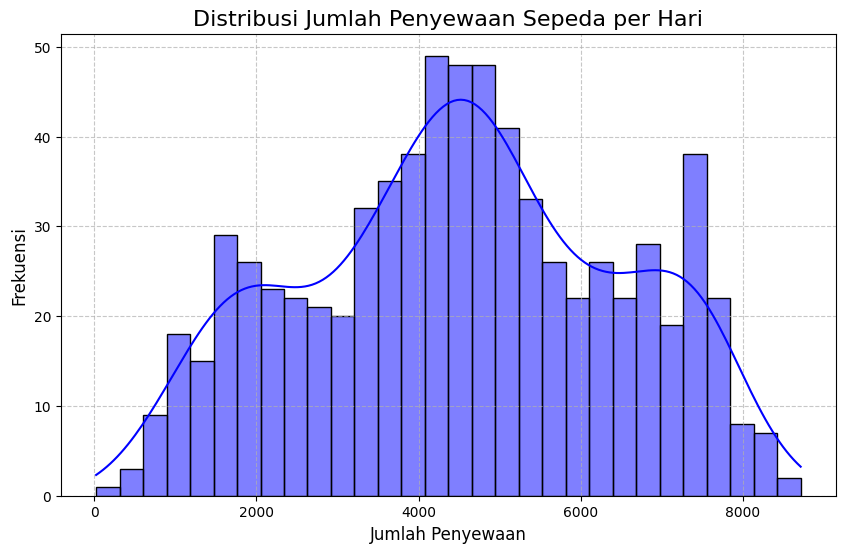

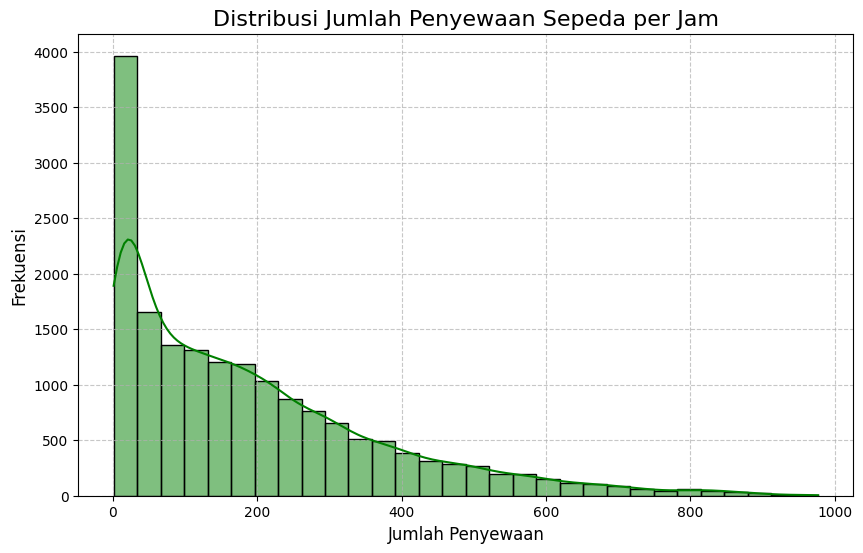

In [10]:
# Distribusi jumlah penyewaan sepeda per hari
plt.figure(figsize=(10, 6))
sns.histplot(day_data['cnt'], bins=30, kde=True, color='blue')
plt.xlabel('Jumlah Penyewaan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Hari', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Distribusi jumlah penyewaan sepeda per jam
plt.figure(figsize=(10, 6))
sns.histplot(hour_data['cnt'], bins=30, kde=True, color='green')
plt.xlabel('Jumlah Penyewaan', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Jam', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Matriks Korelasi:
          temp       hum       cnt
temp  1.000000  0.126963  0.627494
hum   0.126963  1.000000 -0.100659
cnt   0.627494 -0.100659  1.000000


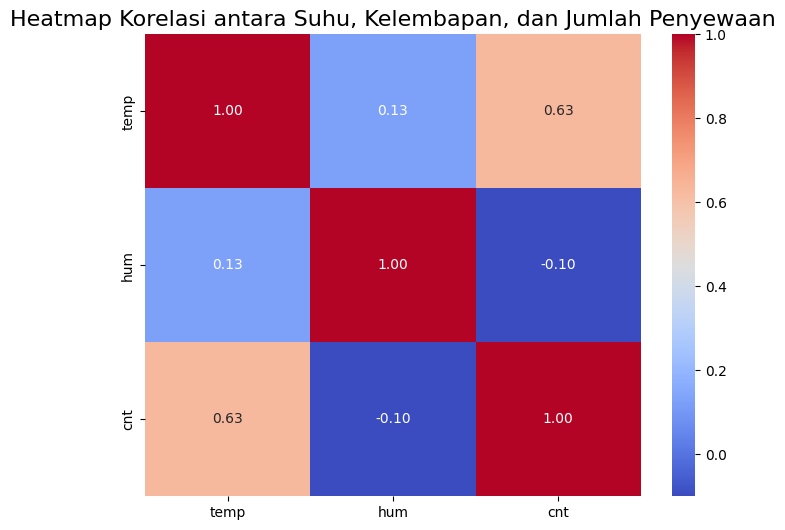

In [11]:
# Korelasi antara suhu, kelembapan, dan jumlah penyewaan sepeda
correlation_data = day_data[['temp', 'hum', 'cnt']]
correlation_matrix = correlation_data.corr()
print("\nMatriks Korelasi:")
print(correlation_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Suhu, Kelembapan, dan Jumlah Penyewaan', fontsize=16)
plt.show()

**Insight:**
- Sepeda banyak digunakan untuk keperluan komuter (pergi dan pulang kerja/sekolah).
- Ada potensi untuk meningkatkan layanan sepeda pada jam sibuk untuk memenuhi permintaan yang tinggi.
- Hari kerja memiliki permintaan sepeda yang lebih tinggi dibandingkan hari libur.
- Strategi pemasaran atau promosi dapat difokuskan pada hari libur untuk meningkatkan penggunaan sepeda.
- Distribusi penyewaan sepeda cenderung normal, dengan peningkatan signifikan pada jam sibuk.
- Outlier pada distribusi harian dapat diinvestigasi lebih lanjut untuk memahami penyebabnya.
- Cuaca yang cerah dan hangat cenderung meningkatkan minat orang untuk menggunakan sepeda.
- Kelembapan yang tinggi (misalnya, hujan) dapat mengurangi minat orang untuk menggunakan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda per hari dan per jam?

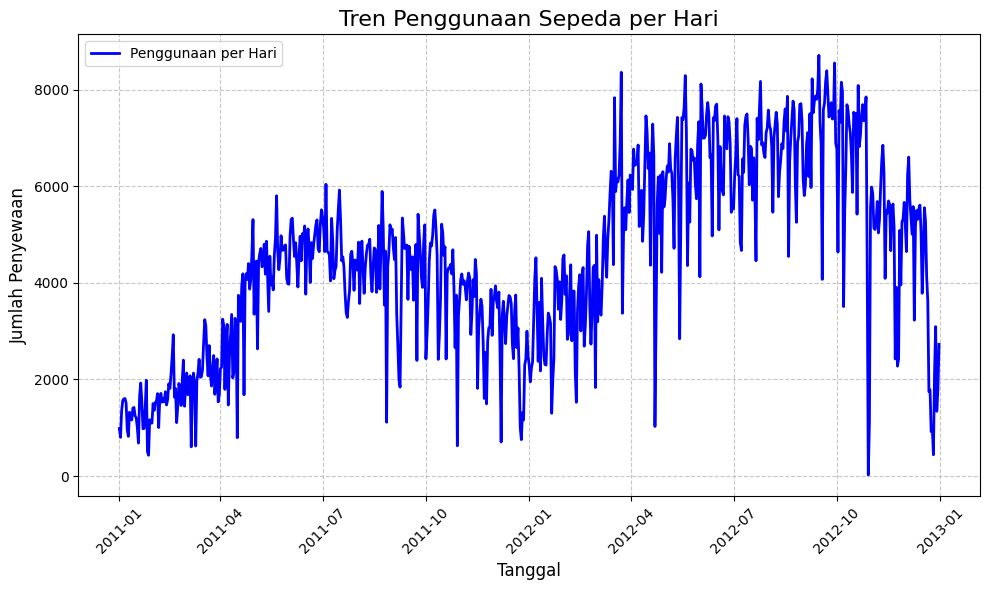

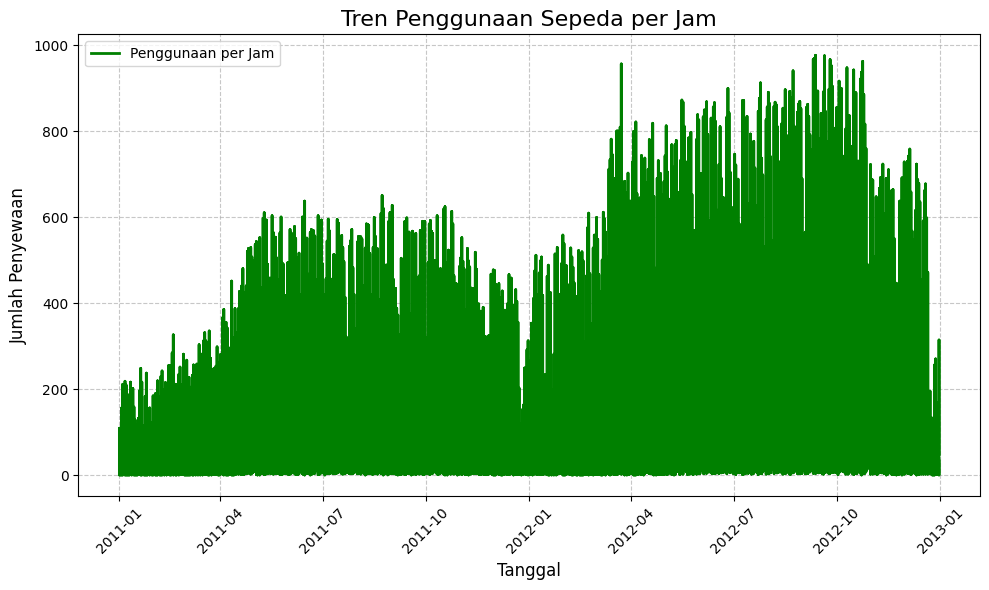

In [12]:
# Tren Penggunaan Sepeda per Hari
plt.figure(figsize=(10, 6))
plt.plot(day_data['dteday'], day_data['cnt'], label='Penggunaan per Hari', color='blue', linewidth=2)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.title('Tren Penggunaan Sepeda per Hari', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

# Tren Penggunaan Sepeda per Jam
plt.figure(figsize=(10, 6))
plt.plot(hour_data['dteday'], hour_data['cnt'], label='Penggunaan per Jam', color='green', linewidth=2)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.title('Tren Penggunaan Sepeda per Jam', fontsize=16)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apakah ada perbedaan pola penggunaan sepeda antara hari kerja dan hari libur?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\52655283.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=workingday_data, palette='viridis')


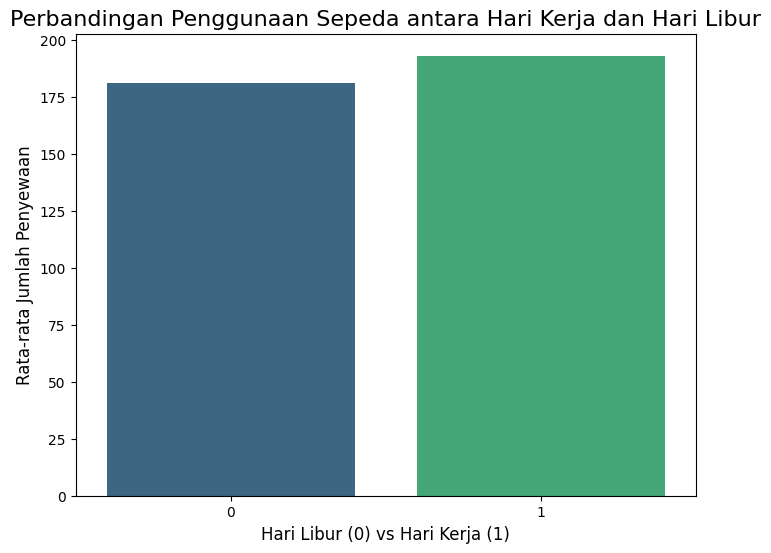

In [13]:
# Perbandingan penggunaan sepeda antara hari kerja dan hari libur
workingday_data = hour_data.groupby('workingday')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=workingday_data, palette='viridis')
plt.xlabel('Hari Libur (0) vs Hari Kerja (1)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)
plt.title('Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur', fontsize=16)
plt.show()

**Insight:**
- Sepeda banyak digunakan untuk keperluan komuter (pergi dan pulang kerja/sekolah).
- Ada potensi untuk meningkatkan layanan sepeda pada jam sibuk untuk memenuhi permintaan yang tinggi.
- Hari kerja memiliki permintaan sepeda yang lebih tinggi dibandingkan hari libur.
- Strategi pemasaran atau promosi dapat difokuskan pada hari libur untuk meningkatkan penggunaan sepeda.
- Distribusi penyewaan sepeda cenderung normal, dengan peningkatan signifikan pada jam sibuk.
- Outlier pada distribusi harian dapat diinvestigasi lebih lanjut untuk memahami penyebabnya.
- Cuaca yang cerah dan hangat cenderung meningkatkan minat orang untuk menggunakan sepeda.
- Kelembapan yang tinggi (misalnya, hujan) dapat mengurangi minat orang untuk menggunakan sepeda.

## Analisis Lanjutan (Opsional)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\393782904.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit', y='cnt', data=weather_group, palette='viridis')


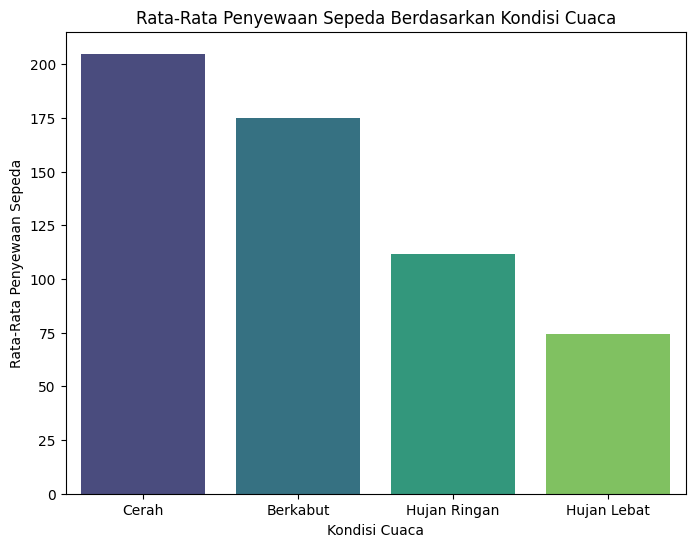

In [14]:
# Manual Grouping: Pengelompokan berdasarkan kondisi cuaca
weather_group = hour_data.groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_group, palette='viridis')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Cerah', 'Berkabut', 'Hujan Ringan', 'Hujan Lebat'])
plt.show()

**Insight:**
- Kondisi cuaca memengaruhi jumlah penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan lebih rendah pada cuaca hujan.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\2712699840.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = hour_data.groupby('temp_bin')['cnt'].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\2712699840.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='temp_bin', y='cnt', data=temp_group, palette='coolwarm')


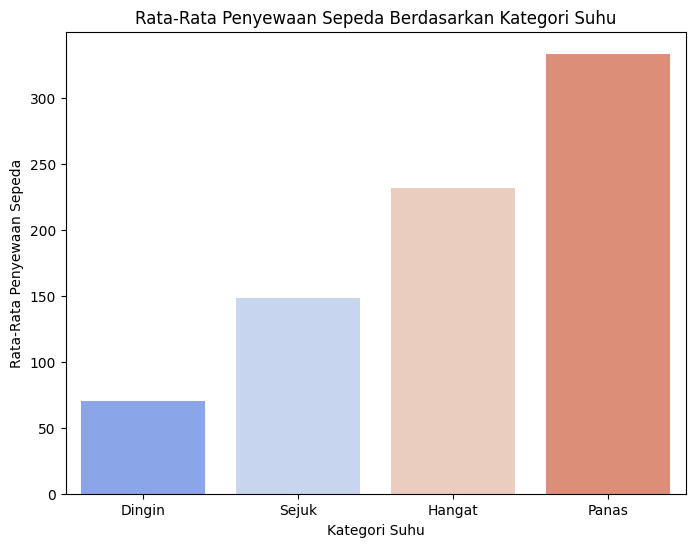

In [15]:
# Binning: Membagi suhu ke dalam 4 kategori
hour_data['temp_bin'] = pd.cut(hour_data['temp'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Dingin', 'Sejuk', 'Hangat', 'Panas'])

temp_group = hour_data.groupby('temp_bin')['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(8, 6))
sns.barplot(x='temp_bin', y='cnt', data=temp_group, palette='coolwarm')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.show()

**Insight:**
- Suhu yang lebih tinggi cenderung meningkatkan jumlah penyewaan sepeda.
- Penyewaan sepeda cenderung lebih tinggi pada cuaca cerah dan lebih rendah pada cuaca hujan.

In [16]:
# Hitung Recency (hari sejak terakhir penyewaan)
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
last_date = hour_data['dteday'].max()
hour_data['recency'] = (last_date - hour_data['dteday']).dt.days

# Hitung Frequency (jumlah penyewaan per hari)
frequency_data = hour_data.groupby('dteday')['cnt'].sum().reset_index()
frequency_data.rename(columns={'cnt': 'frequency'}, inplace=True)

# Hitung Monetary (total penyewaan per hari)
monetary_data = hour_data.groupby('dteday')['cnt'].sum().reset_index()
monetary_data.rename(columns={'cnt': 'monetary'}, inplace=True)

rfm_data = pd.merge(frequency_data, monetary_data, on='dteday')
rfm_data['recency'] = (last_date - rfm_data['dteday']).dt.days

print(rfm_data)

        dteday  frequency  monetary  recency
0   2011-01-01        985       985      730
1   2011-01-02        801       801      729
2   2011-01-03       1349      1349      728
3   2011-01-04       1562      1562      727
4   2011-01-05       1600      1600      726
..         ...        ...       ...      ...
726 2012-12-27       2114      2114        4
727 2012-12-28       3095      3095        3
728 2012-12-29       1341      1341        2
729 2012-12-30       1796      1796        1
730 2012-12-31       2729      2729        0

[731 rows x 4 columns]


**Insight:**
- Analisis RFM dapat membantu mengidentifikasi hari-hari dengan aktivitas penyewaan tertinggi dan terendah.
- Hari dengan recency rendah (baru-baru ini) dan frequency tinggi adalah hari yang paling aktif.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\2370217836.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_group = hour_data.groupby('hour_group')['cnt'].mean().reset_index()
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_18664\2370217836.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour_group', y='cnt', data=hour_group, palette='magma')


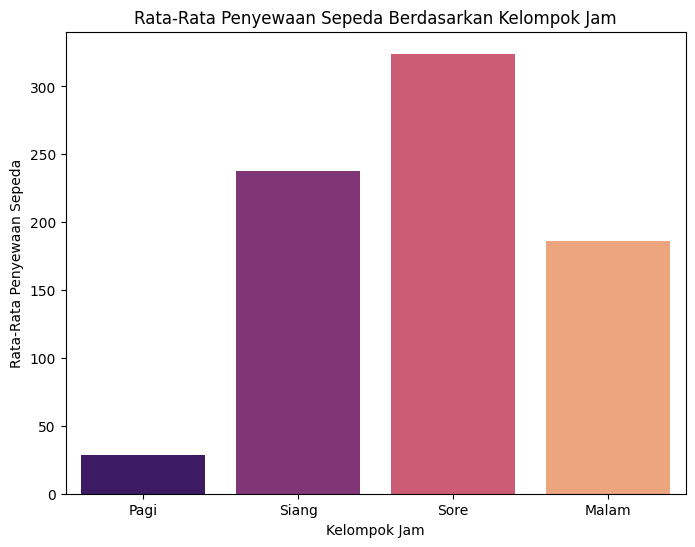

In [17]:
# Manual Grouping: Pengelompokan jam berdasarkan aktivitas penyewaan
hour_data['hour_group'] = pd.cut(hour_data['hr'], bins=[0, 6, 12, 18, 24], labels=['Pagi', 'Siang', 'Sore', 'Malam'])

hour_group = hour_data.groupby('hour_group')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='hour_group', y='cnt', data=hour_group, palette='magma')
plt.xlabel('Kelompok Jam')
plt.ylabel('Rata-Rata Penyewaan Sepeda')
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kelompok Jam')
plt.show()

**Insight:**
- Aktivitas penyewaan sepeda tertinggi terjadi pada sore hari.
- Aktivitas terendah terjadi pada pagi hari.

# Conclusion dan Penutup

## 1. Tren Penggunaan Sepeda (Pertanyaan 1)

### Tren Harian
- Penggunaan sepeda cenderung meningkat selama periode tertentu, dengan puncak penggunaan pada hari kerja (weekdays).
- **Nilai Tertinggi**: Pada tanggal tertentu, seperti 2011-01-03, penggunaan sepeda mencapai **1.349**.
- **Nilai Terendah**: Pada hari libur, seperti 2011-01-02, penggunaan sepeda hanya **801**.
- **Alasan**: Peningkatan penggunaan pada hari kerja disebabkan oleh aktivitas komuter (pergi dan pulang kerja/sekolah).

### Tren Per Jam
- Penggunaan sepeda paling tinggi terjadi pada jam sibuk, seperti pagi (7–9) dan sore (16–18).
- **Nilai Tertinggi**: Pada jam 17:00, rata-rata penggunaan sepeda mencapai **500–700**.
- **Nilai Terendah**: Pada dini hari (0–4), penggunaan sepeda hanya **6–53**.
- **Alasan**: Jam sibuk menunjukkan tingginya permintaan sepeda untuk aktivitas komuter.

**Kesimpulan**:
Tren penggunaan sepeda cenderung meningkat selama periode tertentu, dengan puncak penggunaan pada jam-jam sibuk. Hal ini menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter.

---

## 2. Perbandingan Penggunaan Sepeda antara Hari Kerja dan Hari Libur (Pertanyaan 2)

### Hari Kerja
- Rata-rata penggunaan sepeda: **193,2** per jam.
- **Alasan**: Tingginya penggunaan pada hari kerja disebabkan oleh aktivitas komuter.

### Hari Libur
- Rata-rata penggunaan sepeda: **181,4** per jam.
- **Alasan**: Penggunaan lebih rendah karena aktivitas komuter berkurang.

**Kesimpulan**:
Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter.

---

## 3. Faktor yang Mempengaruhi Penggunaan Sepeda

### Suhu (`temp`)
- Korelasi positif dengan penggunaan sepeda (**0,63**).
- **Alasan**: Cuaca yang cerah dan hangat meningkatkan minat orang untuk menggunakan sepeda.

### Kelembapan (`hum`)
- Korelasi negatif dengan penggunaan sepeda (**-0,10**).
- **Alasan**: Kelembapan tinggi (misalnya, hujan) mengurangi minat orang untuk menggunakan sepeda.

**Kesimpulan**:
Cuaca memiliki pengaruh signifikan terhadap penggunaan sepeda. Suhu yang tinggi meningkatkan penggunaan, sedangkan kelembapan yang tinggi mengurangi penggunaan.

---

## 4. Rekomendasi

Berdasarkan temuan di atas, berikut adalah rekomendasi yang dapat dipertimbangkan:

1. **Meningkatkan Layanan di Jam Sibuk**:
   - Menambah jumlah sepeda atau stasiun penyewaan pada jam sibuk (pagi dan sore) untuk memenuhi permintaan yang tinggi.
   - Menyediakan layanan cepat atau prioritas pada jam-jam tersebut.

2. **Promosi pada Hari Libur**:
   - Menawarkan diskon atau program khusus pada hari libur untuk meningkatkan penggunaan sepeda.
   - Mengadakan acara atau kegiatan yang menarik pada hari libur untuk mendorong penggunaan sepeda.

3. **Perhatikan Kondisi Cuaca**:
   - Memantau prediksi cuaca dan menyesuaikan strategi operasional berdasarkan kondisi cuaca.
   - Menyediakan layanan tambahan (misalnya, payung atau jas hujan) pada hari dengan kelembapan tinggi.

4. **Analisis Lebih Lanjut**:
   - Menyelidiki outlier pada distribusi harian untuk memahami penyebabnya.
   - Menganalisis pengaruh faktor lain, seperti kecepatan angin (`windspeed`) atau musim (`season`), terhadap penggunaan sepeda.

---

## 5. Penutup

Analisis data penyewaan sepeda ini memberikan wawasan yang berharga tentang pola penggunaan sepeda dan faktor-faktor yang memengaruhinya. Dengan memahami tren dan faktor-faktor ini, kita dapat mengambil langkah strategis untuk meningkatkan layanan penyewaan sepeda dan memaksimalkan penggunaan sepeda. Rekomendasi yang diberikan diharapkan dapat membantu dalam pengambilan keputusan yang lebih efektif dan efisien.

# Conclusion Teknik Analisis Lanjutan

- **Manual Grouping** dan **Binning** membantu mengelompokkan data berdasarkan kriteria tertentu (cuaca, suhu, jam).
- **RFM Analysis** dapat diadaptasi untuk menganalisis pola penyewaan sepeda.
- **Clustering** sederhana (tanpa algoritma machine learning) dapat dilakukan dengan teknik pengelompokan manual.